In [1]:
import os
import pickle
from modules.utils import path_main
from modules import statistics

# pickle 파일에서 클래스 인스턴스 불러오기
with open(os.path.join(path_main, 'D:/USC/01_code/INS_clustering_v06/_clustering_v01.pkl'), 'rb') as f:
    _clustering = pickle.load(f)

# load 1ch df_demo
df_demo = _clustering.df_demo.copy()
# udate and save df_demo_HI_psm by adding new labels (여기)
df_demo_HI_psm = statistics.get_df_demo_HI_psm()
df_1ch = df_demo_HI_psm.copy()

for idx in df_demo.index:
    # con = df_1ch['PSG study Number#'].isin([idx])
    df_1ch.loc[idx, 'labels'] = df_demo.loc[idx, 'labels']

print((df_1ch.labels == 0).sum())
print((df_1ch.labels == 1).sum())
print((df_1ch.labels == 2).sum())

Laod df_init.csv ... Successful !!

Load 'df_demo_2000t_16f_healthy_insomnia.csv' and 'scalogram_2000t_16f_healthy_insomnia.npy' (1877, 16, 2000, 6)
Load 'df_demo_2000t_16f_only_insomnia.csv' and 'scalogram_2000t_16f_only_insomnia.npy' (682, 16, 2000, 1)
181
501
682


In [2]:
from modules.summary import *
from modules import visualize_eeg

_demo_summary = demo_summary(df_demo_HI_psm=df_1ch.copy())
_eeg = visualize_eeg.EEG_storage(_demo_summary=_demo_summary)


Para: 181
Non-para: 501
GS (PI): 682


0it [00:00, ?it/s]

### Delta power in N3

In [3]:
df_demo = _demo_summary.df_stat_demo_psm_age_sex.copy()
df_demo.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/df_demo.csv")


In [28]:
_eeg.session_dic_posthoc_p['WholeNight_Stage']['Delta_3']

[0.05053972301957311, 0.004438282293406766, 5.270983971033082e-05]

In [ ]:
_eeg.session_dic_posthoc_p['Quartile_Stage']['Alpha_Q2_STAGE3']

[0.784801350124916, 0.023687913244016836, 0.049720154368448566]

In [24]:
_eeg.statistic_Quartile_Stage

,HS,Subtype 1 (PDI),Subtype 2 (PPI),Statistic,p,p_corrected,,effect_3group,effect_3group_type,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2,effect_pair_type,Post hoc
N,682,181,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delta_Q0_STAGE0,0.52 (0.14),0.47 (0.14),0.51 (0.14),K,0.000,< 0.001,+++,0.010,epsilon2_kruskal,0.166,0.029,0.190,cliffs_delta,"b << c , a ( >>> b)"
Theta_Q0_STAGE0,0.15 (0.05),0.15 (0.05),0.14 (0.04),K,0.000,< 0.001,+++,0.012,epsilon2_kruskal,0.126,0.139,0.021,cliffs_delta,"c < b , a ( >>> c)"
Alpha_Q0_STAGE0,0.15 (0.09),0.18 (0.11),0.15 (0.09),K,0.000,< 0.001,+++,0.011,epsilon2_kruskal,0.183,0.005,0.189,cliffs_delta,"c , a <<< b ( >>> c)"
Sigma_Q0_STAGE0,0.05 (0.02),0.06 (0.03),0.06 (0.02),K,0.000,< 0.001,+++,0.011,epsilon2_kruskal,0.019,0.123,0.142,cliffs_delta,"a <<< c , b ( >> a)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
alpha_delta_Q3_STAGE4,0.16 (0.08),0.16 (0.08),0.17 (0.08),K,0.563,0.589,ns,-0.001,epsilon2_kruskal,0.007,0.034,0.032,cliffs_delta,"a , b , c ( , a)"
labels,2.00 (0.00),0.00 (0.00),1.00 (0.00),W,1.000,1.000,ns,0.000,eta2_welch,NaN,NaN,NaN,hedges_g,b <<< c <<< a ( >>> b)
sex,0.45 (0.00),0.36 (0.00),0.46 (0.00),C,0.075,0.088,ns,0.062,cramers_v,0.596,0.967,0.692,odds_ratio,"b < a , c ( >> b)"
age,51.07 (16.05),50.65 (13.81),50.87 (15.37),K,0.803,0.812,ns,-0.001,epsilon2_kruskal,0.013,0.014,0.031,cliffs_delta,"b , c , a ( , b)"


,HS,Subtype 1 (PDI),Subtype 2 (PPI),,p_corrected,,Post hoc,effect_3group,effect_pair_type,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,,
"N3, %",6.81 (7.78),6.75 (7.69),5.03 (6.49),W,< 0.001,+++,"c < b , a ( >>> c)",0.039,hedges_g,0.252,0.244,0.007
Relative delta power in N3,0.84 (0.06),0.82 (0.08),0.83 (0.07),K,< 0.001,+++,"b , c << a ( >>> b)",0.013,cliffs_delta,0.099,0.098,0.197
Delta_Q0_STAGE3,0.84 (0.06),0.81 (0.07),0.83 (0.07),K,< 0.001,+++,b < c < a ( >>> b),0.013,cliffs_delta,0.116,0.086,0.207
Delta_Q1_STAGE3,0.84 (0.06),0.83 (0.07),0.83 (0.07),K,0.037,+,"c , b , a ( > c)",0.004,cliffs_delta,0.003,0.088,0.093
Delta_Q2_STAGE3,0.82 (0.08),0.80 (0.10),0.80 (0.10),K,0.039,+,"b , c < a ( > b)",0.005,cliffs_delta,0.019,0.093,0.107
Delta_Q3_STAGE3,0.81 (0.08),0.80 (0.08),0.81 (0.08),K,0.091,ns,"b , c , a ( > b)",0.004,cliffs_delta,0.059,0.068,0.123


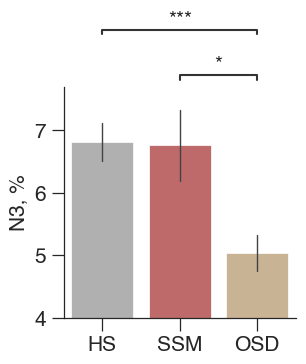

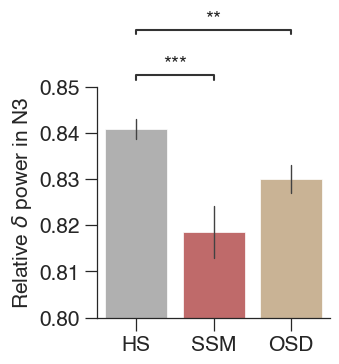

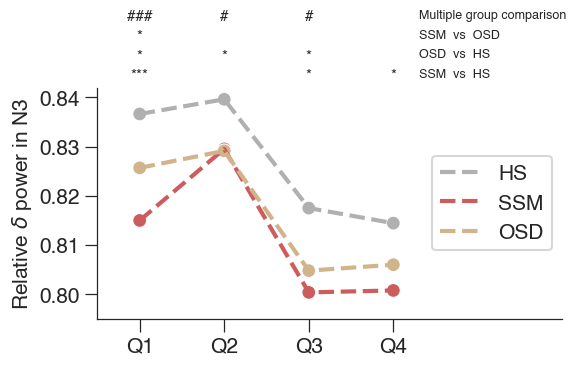

In [17]:
import matplotlib.pyplot as plt
from modules import plot_with_statistic

feature = 'N3'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='N3, %', y_min=4)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

feature = 'Delta_3'
_eeg.df_BandPower_WholeNight_Stage.loc[_demo_summary.df_demo_HI_psm.index, 'labels'] = _demo_summary.df_demo_HI_psm.labels
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_eeg.df_BandPower_WholeNight_Stage, feature, ax, _eeg.session_dic_posthoc_p['WholeNight_Stage'], custom_ylabel='Relative $\delta$ power in N3', y_min=0.8, y_max=0.85)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

_eeg.addLabel_melt_QS()
_eeg.plot_quartile_change(feature='Delta', ex_feature=['alpha', 'Alpha'], stage_selection=3, ymin=0.795)
# plt.savefig("../results_v02/fig2/%s.png" % "quartile delta power.png", bbox_inches='tight')

# -- Statistical Table
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_pair_type', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']

df_concat = pd.concat([_demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'N3'], list_columns],
                       _eeg.statistic_WholeNight_Stage.loc[['Delta_3'], list_columns],
                       _eeg.statistic_Quartile_Stage.loc[['Delta_Q0_STAGE3', 'Delta_Q1_STAGE3', 'Delta_Q2_STAGE3', 'Delta_Q3_STAGE3'], list_columns]
                      ])
df_concat.rename(columns={"Statistic": ""},
                 index={"sex": "Male, %", "N3": "N3, %", "Delta_3": "Relative delta power in N3"}, inplace=True)

df_concat = statistics.merge_N_Male(group_num=3, df_stat=df_concat)
df_concat.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/EEG_delta_power.csv")

display(df_concat)

### Alpha power in N3

,HS,Subtype 1 (PDI),Subtype 2 (PPI),,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
"N3, %",6.81 (7.78),6.75 (7.69),5.03 (6.49),W,< 0.001,+++,"c < b , a ( >>> c)",0.039,0.252,0.244,0.007
Relative Alpha power in N3,0.04 (0.02),0.05 (0.03),0.04 (0.03),K,< 0.001,+++,"a << c , b ( >>> a)",0.013,0.089,0.106,0.186
Alpha_Q0_STAGE3,0.04 (0.03),0.05 (0.03),0.05 (0.04),K,< 0.001,+++,a << c < b ( >>> a),0.014,0.114,0.098,0.209
Alpha_Q1_STAGE3,0.04 (0.03),0.04 (0.02),0.04 (0.03),K,0.035,+,"a < b , c ( > a)",0.004,0.026,0.083,0.107
Alpha_Q2_STAGE3,0.05 (0.04),0.05 (0.04),0.05 (0.04),K,0.051,ns,"a < c , b ( , a)",0.004,0.02,0.085,0.106
Alpha_Q3_STAGE3,0.04 (0.03),0.05 (0.04),0.05 (0.04),K,0.053,ns,"a , c , b ( > a)",0.005,0.079,0.067,0.141


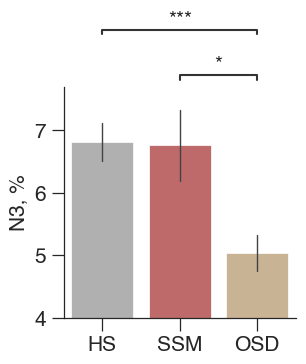

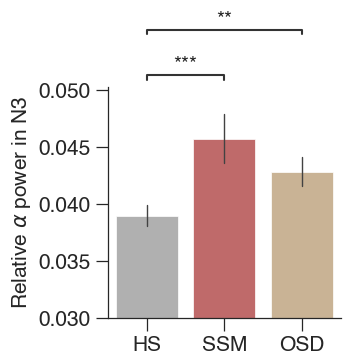

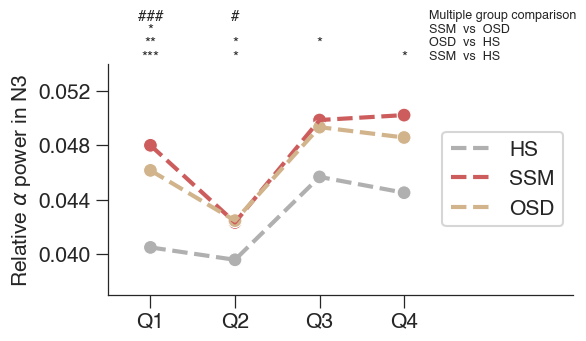

In [6]:
import matplotlib.pyplot as plt

feature = 'N3'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='N3, %', y_min=4)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

feature = 'Alpha_3'
_eeg.df_BandPower_WholeNight_Stage.loc[_demo_summary.df_demo_HI_psm.index, 'labels'] = _demo_summary.df_demo_HI_psm.labels
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_eeg.df_BandPower_WholeNight_Stage, feature, ax, _eeg.session_dic_posthoc_p['WholeNight_Stage'], custom_ylabel='Relative $\\alpha$ power in N3', y_min=0.03, y_max=None)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

_eeg.addLabel_melt_QS()
_eeg.plot_quartile_change(feature='Alpha', ex_feature=['Theta', 'Delta'], ymin=0.037, ymax=0.054, y_ref_u=0.058, y_space=0.001, ylabel='Relative $\\alpha$ power in N3', stage_selection=3)
# plt.savefig("../results_v02/fig2/%s.png" % "quartile alpha power.png", bbox_inches='tight')

# -- Table
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']

df_concat = pd.concat([_demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'N3'], list_columns],
                       _eeg.statistic_WholeNight_Stage.loc[['Alpha_3'], list_columns],
                       _eeg.statistic_Quartile_Stage.loc[['Alpha_Q0_STAGE3', 'Alpha_Q1_STAGE3', 'Alpha_Q2_STAGE3', 'Alpha_Q3_STAGE3'], list_columns]
                      ])
df_concat.rename(columns={"Statistic": ""},
                 index={"sex": "Male, %", "N3": "N3, %", "Alpha_3": "Relative Alpha power in N3"}, inplace=True)

df_concat = statistics.merge_N_Male(group_num=3, df_stat=df_concat)
df_concat.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/EEG_alpha_power.csv")

display(df_concat)

### Alpha/delta ratio in N3

,HS,Subtype 1 (PDI),Subtype 2 (PPI),,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
"N3, %",6.81 (7.78),6.75 (7.69),5.03 (6.49),W,< 0.001,+++,"c < b , a ( >>> c)",0.039,0.252,0.244,0.007
alpha/delta in N3,0.05 (0.04),0.06 (0.09),0.06 (0.06),K,< 0.001,+++,"a << c , b ( >>> a)",0.013,0.09,0.107,0.189
alpha_delta_Q0_STAGE3,0.05 (0.04),0.06 (0.05),0.06 (0.13),K,< 0.001,+++,a <<< b < c ( >> a),0.014,0.114,0.097,0.21
alpha_delta_Q1_STAGE3,0.05 (0.05),0.05 (0.04),0.05 (0.05),K,0.034,+,"a < b , c ( > a)",0.005,0.023,0.084,0.106
alpha_delta_Q2_STAGE3,0.07 (0.24),0.09 (0.29),0.08 (0.15),K,0.046,+,"a < c , b ( > a)",0.005,0.026,0.087,0.108
alpha_delta_Q3_STAGE3,0.06 (0.10),0.07 (0.12),0.07 (0.14),K,0.050,+,"a , c , b ( > a)",0.006,0.076,0.07,0.141


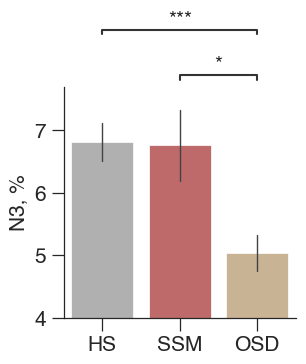

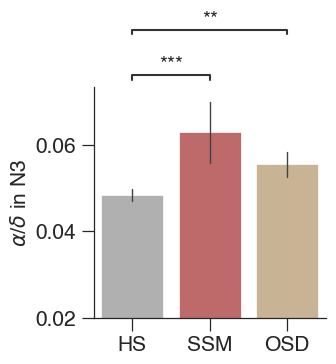

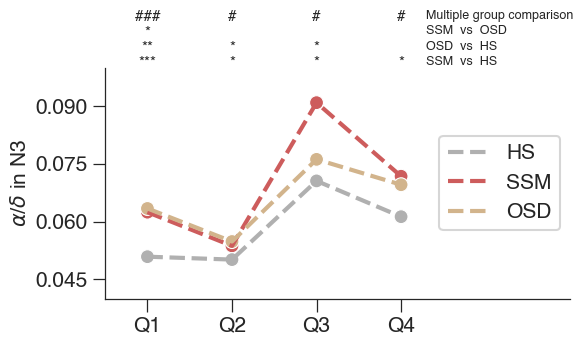

In [7]:
import matplotlib.pyplot as plt

feature = 'N3'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='N3, %', y_min=4)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

feature = 'alpha_delta_3'
_eeg.df_BandPower_WholeNight_Stage.loc[_demo_summary.df_demo_HI_psm.index, 'labels'] = _demo_summary.df_demo_HI_psm.labels
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_eeg.df_BandPower_WholeNight_Stage, feature, ax, _eeg.session_dic_posthoc_p['WholeNight_Stage'], custom_ylabel='$\\alpha$/$\delta$ in N3', y_min=0.02, y_max=None)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

_eeg.addLabel_melt_QS()
_eeg.plot_quartile_change(feature='alpha_delta', ymin=0.04, ymax=0.1, y_ref_u=0.115, ylabel='$\\alpha$/$\delta$ in N3', stage_selection=3)
# plt.savefig("../results_v02/fig2/%s.png" % "quartile alpha_delta.png", bbox_inches='tight')

import pandas as pd
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']

df_concat = pd.concat([_demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'N3'], list_columns],
                       _eeg.statistic_WholeNight_Stage.loc[['alpha_delta_3'], list_columns],
                       _eeg.statistic_Quartile_Stage.loc[['alpha_delta_Q0_STAGE3', 'alpha_delta_Q1_STAGE3', 'alpha_delta_Q2_STAGE3', 'alpha_delta_Q3_STAGE3'], list_columns]
                      ])
df_concat.rename(columns={"Statistic": ""},
                 index={"sex": "Male, %", "N3": "N3, %", "alpha_delta_3": "alpha/delta in N3"}, inplace=True)

df_concat = statistics.merge_N_Male(group_num=3, df_stat=df_concat)
df_concat.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/EEG_alpha_delta.csv")


display(df_concat)

### Delta power in N2

,HS,Subtype 1 (PDI),Subtype 2 (PPI),,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
"N2, %",56.73 (9.84),57.59 (10.44),59.21 (11.13),W,< 0.001,+++,"a , b , c ( >>> a)",0.031,0.147,0.238,0.087
Relative delta power in N2,0.68 (0.07),0.66 (0.07),0.67 (0.07),K,< 0.001,+++,"b , c << a ( >>> b)",0.014,0.089,0.108,0.197
Delta_Q0_STAGE2,0.69 (0.07),0.67 (0.07),0.69 (0.07),K,0.020,+,"b < c , a ( >> b)",0.005,0.11,0.033,0.141
Delta_Q1_STAGE2,0.69 (0.08),0.66 (0.08),0.68 (0.08),K,< 0.001,+++,b < c << a ( >>> b),0.014,0.101,0.101,0.201
Delta_Q2_STAGE2,0.68 (0.07),0.65 (0.08),0.65 (0.08),K,< 0.001,+++,"b , c <<< a ( >>> b)",0.021,0.065,0.147,0.219
Delta_Q3_STAGE2,0.66 (0.08),0.64 (0.08),0.64 (0.08),K,< 0.001,+++,"c , b << a ( >>> c)",0.017,0.017,0.157,0.147


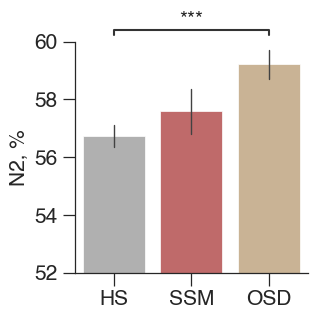

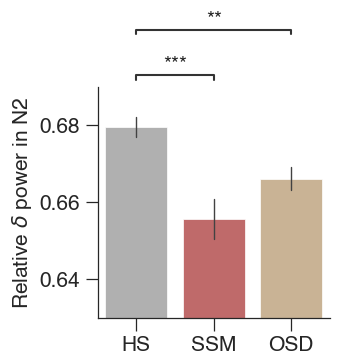

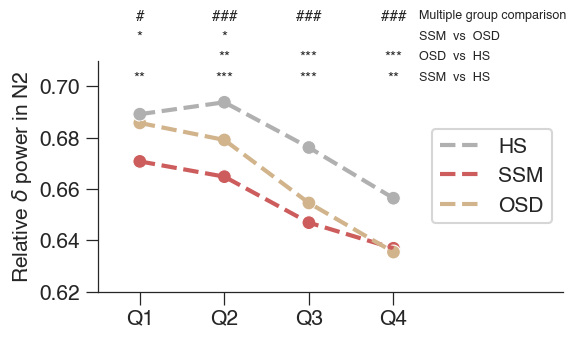

In [8]:
import matplotlib.pyplot as plt

feature = 'N2'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='N2, %', y_min=52, y_max=60)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

feature = 'Delta_2'
_eeg.df_BandPower_WholeNight_Stage.loc[_demo_summary.df_demo_HI_psm.index, 'labels'] = _demo_summary.df_demo_HI_psm.labels
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_eeg.df_BandPower_WholeNight_Stage, feature, ax, _eeg.session_dic_posthoc_p['WholeNight_Stage'], custom_ylabel='Relative $\delta$ power in N2', y_min=0.63, y_max=0.69)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

_eeg.addLabel_melt_QS()
_eeg.plot_quartile_change(feature='Delta', ex_feature=['alpha', 'Alpha'], stage_selection=2, ymin=0.62, ymax=0.71, y_ref_u=0.73, y_space=0.008, ylabel='Relative $\delta$ power in N2')
# plt.savefig("../results_v02/fig2/%s.png" % "quartile delta power.png", bbox_inches='tight')

# -- Statistical Table
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']

df_concat = pd.concat([_demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'N2'], list_columns],
                       _eeg.statistic_WholeNight_Stage.loc[['Delta_2'], list_columns],
                       _eeg.statistic_Quartile_Stage.loc[['Delta_Q0_STAGE2', 'Delta_Q1_STAGE2', 'Delta_Q2_STAGE2', 'Delta_Q3_STAGE2'], list_columns]
                      ])
df_concat.rename(columns={"Statistic": ""},
                 index={"sex": "Male, %", "N2": "N2, %", "Delta_2": "Relative delta power in N2"}, inplace=True)
df_concat = statistics.merge_N_Male(group_num=3, df_stat=df_concat)
df_concat.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/EEG_delta_power_N2.csv")

display(df_concat)

### Alpha power in N2

,HS,Subtype 1 (PDI),Subtype 2 (PPI),,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
"N2, %",56.73 (9.84),57.59 (10.44),59.21 (11.13),W,< 0.001,+++,"a , b , c ( >>> a)",0.031,0.147,0.238,0.087
Relative Alpha power in N2,0.08 (0.03),0.09 (0.03),0.09 (0.03),K,< 0.001,+++,a < c < b ( >>> a),0.011,0.105,0.083,0.186
Alpha_Q0_STAGE2,0.08 (0.03),0.09 (0.03),0.08 (0.03),K,0.023,+,"a , c < b ( >> a)",0.005,0.102,0.038,0.139
Alpha_Q1_STAGE2,0.08 (0.03),0.09 (0.03),0.08 (0.03),K,< 0.001,+++,a << c < b ( >>> a),0.014,0.114,0.092,0.206
Alpha_Q2_STAGE2,0.09 (0.03),0.10 (0.04),0.09 (0.03),K,< 0.001,+++,"a << c , b ( >>> a)",0.013,0.096,0.099,0.193
Alpha_Q3_STAGE2,0.09 (0.03),0.10 (0.03),0.09 (0.03),K,0.002,++,"a << c , b ( >> a)",0.01,0.046,0.107,0.148


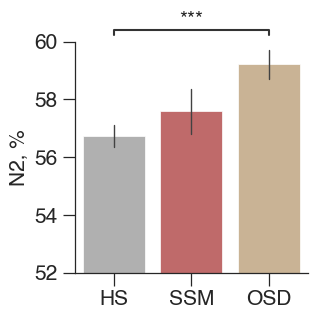

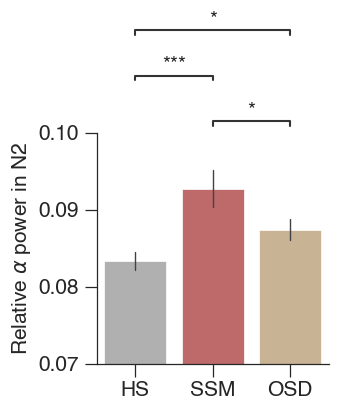

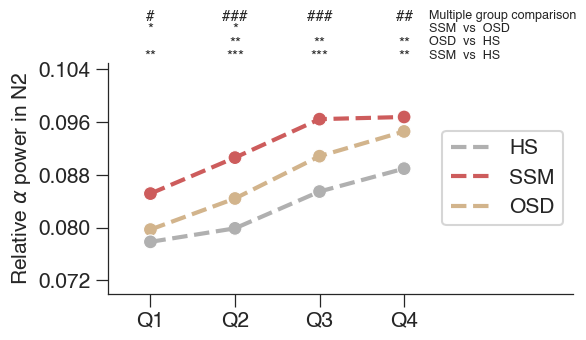

In [9]:
import matplotlib.pyplot as plt

feature = 'N2'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='N2, %', y_min=52, y_max=60)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

feature = 'Alpha_2'
_eeg.df_BandPower_WholeNight_Stage.loc[_demo_summary.df_demo_HI_psm.index, 'labels'] = _demo_summary.df_demo_HI_psm.labels
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_eeg.df_BandPower_WholeNight_Stage, feature, ax, _eeg.session_dic_posthoc_p['WholeNight_Stage'], custom_ylabel='Relative $\\alpha$ power in N2', y_min=0.07, y_max=0.1)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

_eeg.addLabel_melt_QS()
_eeg.plot_quartile_change(feature='Alpha', ex_feature=['Theta', 'Delta'], ymin=0.07, ymax=0.105, y_ref_u=0.113, y_space=0.002, ylabel='Relative $\\alpha$ power in N2', stage_selection=2)
# plt.savefig("../results_v02/fig2/%s.png" % "quartile alpha power.png", bbox_inches='tight')

# -- Table
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']

df_concat = pd.concat([_demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'N2'], list_columns],
                       _eeg.statistic_WholeNight_Stage.loc[['Alpha_2'], list_columns],
                       _eeg.statistic_Quartile_Stage.loc[['Alpha_Q0_STAGE2', 'Alpha_Q1_STAGE2', 'Alpha_Q2_STAGE2', 'Alpha_Q3_STAGE2'], list_columns]
                      ])
df_concat.rename(columns={"Statistic": ""},
                 index={"sex": "Male, %", "N2": "N2, %", "Alpha_2": "Relative Alpha power in N2"}, inplace=True)

df_concat = statistics.merge_N_Male(group_num=3, df_stat=df_concat)
df_concat.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/EEG_alpha_power_N2.csv")

display(df_concat)

### Alpha/delta ratio in N2

,HS,Subtype 1 (PDI),Subtype 2 (PPI),,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
"N2, %",56.73 (9.84),57.59 (10.44),59.21 (11.13),W,< 0.001,+++,"a , b , c ( >>> a)",0.031,0.147,0.238,0.087
alpha/delta in N2,0.13 (0.06),0.15 (0.07),0.14 (0.06),K,< 0.001,+++,a << c < b ( >>> a),0.012,0.102,0.092,0.194
alpha_delta_Q0_STAGE2,0.12 (0.06),0.13 (0.07),0.12 (0.06),K,0.019,+,"a , c < b ( >> a)",0.005,0.106,0.037,0.143
alpha_delta_Q1_STAGE2,0.12 (0.07),0.14 (0.07),0.13 (0.07),K,< 0.001,+++,a << c < b ( >>> a),0.014,0.114,0.097,0.209
alpha_delta_Q2_STAGE2,0.13 (0.07),0.16 (0.08),0.15 (0.08),K,< 0.001,+++,"a <<< c , b ( >>> a)",0.016,0.089,0.116,0.208
alpha_delta_Q3_STAGE2,0.14 (0.08),0.16 (0.08),0.16 (0.08),K,< 0.001,+++,"a <<< c , b ( >> a)",0.012,0.03,0.125,0.156


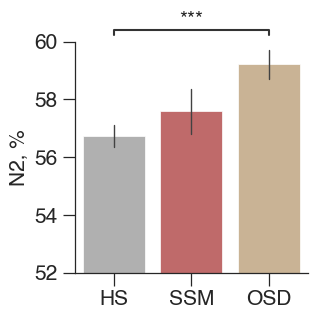

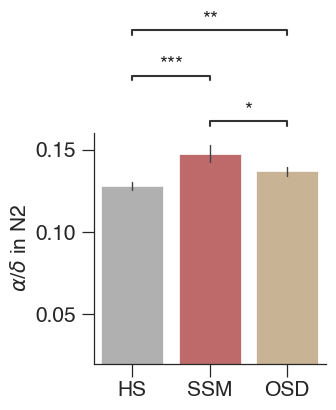

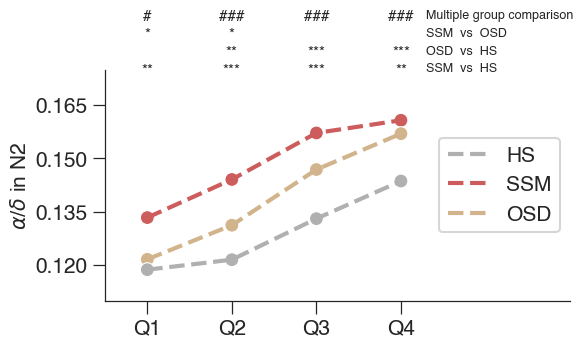

In [10]:
import matplotlib.pyplot as plt

feature = 'N2'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='N2, %', y_min=52, y_max=60)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

feature = 'alpha_delta_2'
_eeg.df_BandPower_WholeNight_Stage.loc[_demo_summary.df_demo_HI_psm.index, 'labels'] = _demo_summary.df_demo_HI_psm.labels
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_barplot(_eeg.df_BandPower_WholeNight_Stage, feature, ax, _eeg.session_dic_posthoc_p['WholeNight_Stage'], custom_ylabel='$\\alpha$/$\delta$ in N2', y_min=0.02, y_max=None)
# plt.savefig("../results_v02/fig2/%s.png" % feature, bbox_inches='tight')

_eeg.addLabel_melt_QS()
_eeg.plot_quartile_change(feature='alpha_delta', ymin=0.11, ymax=0.175, y_ref_u=0.192, y_space=0.005, ylabel='$\\alpha$/$\delta$ in N2', stage_selection=2)
# plt.savefig("../results_v02/fig2/%s.png" % "quartile alpha_delta.png", bbox_inches='tight')

import pandas as pd
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']

df_concat = pd.concat([_demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'N2'], list_columns],
                       _eeg.statistic_WholeNight_Stage.loc[['alpha_delta_2'], list_columns],
                       _eeg.statistic_Quartile_Stage.loc[['alpha_delta_Q0_STAGE2', 'alpha_delta_Q1_STAGE2', 'alpha_delta_Q2_STAGE2', 'alpha_delta_Q3_STAGE2'], list_columns]
                      ])
df_concat.rename(columns={"Statistic": ""},
                 index={"sex": "Male, %", "N2": "N2, %", "alpha_delta_2": "alpha/delta in N2"}, inplace=True)

df_concat = statistics.merge_N_Male(group_num=3, df_stat=df_concat)
df_concat.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/EEG_alpha_delta_N2.csv")

display(df_concat)

### Figure 3.
- A. EEG-based BAI
- B. MRI-based BAI
- C. SNSB cognitive score
- D. BDI
- E. SSS

In [14]:
_mr_summary = mr_summary(_clustering=_clustering)
print(_mr_summary.df_mr_bai_total_psm.labels.value_counts())

_snsb_summary = snsb_summary(_clustering=_clustering)
print(_snsb_summary.df_SNSB_psm.labels.value_counts())

2    133
1     14
0      5
Name: labels, dtype: int64
2    133
1     14
0      5
Name: labels, dtype: int64


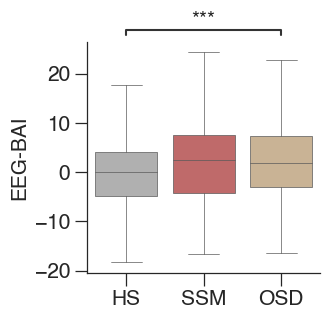

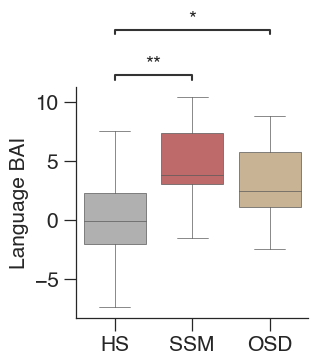

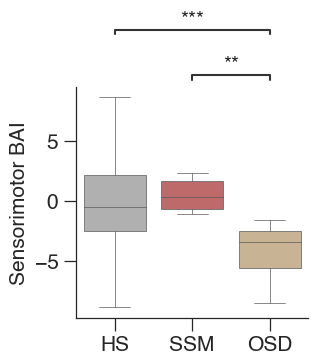

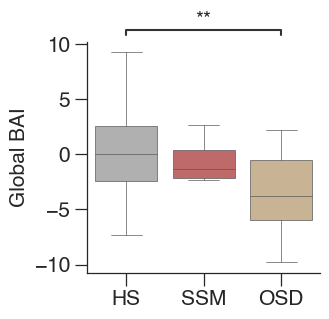

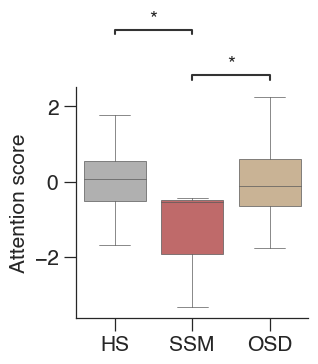

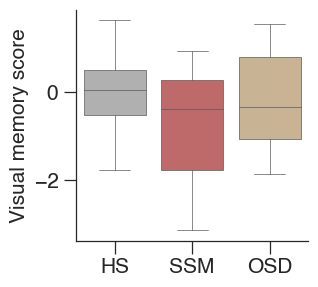

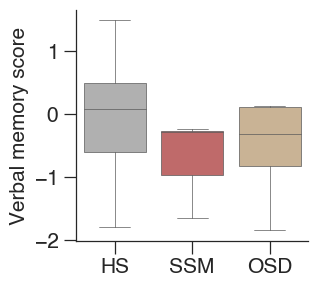

In [29]:
# PSM O
import matplotlib.pyplot as plt

feature = 'bai'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_demo_summary.df_demo_HI_psm, feature, ax, _demo_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='EEG-BAI')
# plt.savefig("../results_v02/fig3/EEG_BAI.png", bbox_inches='tight')

feature = 'Language_BAI'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_mr_summary.df_mr_bai_total_psm, feature, ax, _mr_summary.dic_posthoc_p_psm_age_sex, custom_ylabel=None)
# plt.savefig("../results_v02/fig3/psm_%s.png" % feature, bbox_inches='tight')

feature = 'Sensorimotor_BAI' # post hoc --> fisher (for significance)
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_mr_summary.df_mr_bai_total_psm, feature, ax, _mr_summary.dic_posthoc_p_psm_age_sex, custom_ylabel=None)
# plt.savefig("../results_v02/fig3/psm_%s.png" % feature, bbox_inches='tight')

feature = 'Global_BAI' # post hoc --> fisher (for significance)
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_mr_summary.df_mr_bai_total_psm, feature, ax, _mr_summary.dic_posthoc_p_psm_age_sex, custom_ylabel=None)
# plt.savefig("../results_v02/fig3/psm_%s.png" % feature, bbox_inches='tight')

feature = 'SNSB_Attention'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_snsb_summary.df_SNSB_psm, feature, ax, _snsb_summary.dic_posthoc_p_psm_age_sex, custom_ylabel="Attention score")
# plt.savefig("../results_v02/fig3/psm_%s.png" % feature, bbox_inches='tight')

feature = 'SNSB_Visual_memory'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_snsb_summary.df_SNSB_psm, feature, ax, _snsb_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='Visual memory score')
# plt.savefig("../results_v02/fig3/psm_%s.png" % feature, bbox_inches='tight')

feature = 'SNSB_Verbal_memory'
fig, ax = plt.subplots(1,1, figsize=(3,3))
plot_with_statistic.stat_boxplot(_snsb_summary.df_SNSB_psm, feature, ax, _snsb_summary.dic_posthoc_p_psm_age_sex, custom_ylabel='Verbal memory score')
# plt.savefig("../results_v02/fig3/psm_%s.png" % feature, bbox_inches='tight')

In [16]:
list_columns = ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc', 'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']


# EEG BAI
table_eeg_bai = _demo_summary.df_stat_demo_psm_age_sex.loc[['N', 'sex', 'bai'], list_columns].rename(index={'bai': 'EEG BAI', 'sex': "Male, %"})
table_eeg_bai = statistics.merge_N_Male(group_num=3, df_stat=table_eeg_bai)

# MRI BAI
table_mri_bai_psm = _mr_summary.df_stat_bai_psm_age_sex.loc[['N', 'sex', 'Language_BAI', 'Sensorimotor_BAI', 'Global_BAI'], list_columns].rename(index={'sex': "Male, %",
                                                                                                                                                                'Sensorimotor_BAI': 'Sensorimotor BAI',
                                                                                                                                                                'Language_BAI': 'Language BAI',
                                                                                                                                                                'Global_BAI': 'Global BAI'})
table_mri_bai_psm = statistics.merge_N_Male(group_num=3, df_stat=table_mri_bai_psm)


# SNSB BAI
table_snsb_bai_psm = _snsb_summary.df_stat_SNSB_psm_age_sex.loc[['N', 'sex', 'SNSB_Attention', 'SNSB_Visual_memory', 'SNSB_Verbal_memory'], list_columns].rename(index={'sex': "Male, %",
                                                                                                                                                                         'SNSB_Visual_memory': 'Visual memory',
                                                                                                                                                                         'SNSB_Visual_memory': 'Visual memory',
                                                                                                                                                                         'SNSB_Verbal_memory': 'Verbal memory',})
table_snsb_bai_psm = statistics.merge_N_Male(group_num=3, df_stat=table_snsb_bai_psm)

# -- Sup Table 3. Brain outcomes (PSM)
sup_table_3_psm = pd.concat([table_eeg_bai, table_mri_bai_psm, table_snsb_bai_psm])
sup_table_3_psm.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/sup_table_3_brain_outcomes.csv")
display(sup_table_3_psm)



,HS,Subtype 1 (PDI),Subtype 2 (PPI),Statistic,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
EEG BAI,-0.13 (7.60),2.11 (9.05),2.09 (7.38),W,< 0.001,+++,"a <<< c , b ( > a)",0.052,0.004,0.295,0.281
"N (male, %)",133 (36),5 (0),14 (28),,,,,,,,
Language BAI,0.05 (3.25),5.36 (4.48),3.09 (3.33),L,< 0.001,+++,"a << c , b ( >> a)",0.126,0.624,0.932,1.611
Sensorimotor BAI,-0.25 (3.29),-1.44 (4.15),-2.48 (3.24),L,0.192,ns,"c , b , a ( , c)",0.041,0.302,0.681,0.358
Global BAI,0.05 (3.74),-1.68 (3.51),-3.26 (3.70),L,0.027,+,"c , b , a ( >> c)",0.069,0.433,0.886,0.463
"N (male, %)",133 (51),5 (0),14 (28),,,,,,,,
SNSB_Attention,0.00 (0.84),-1.46 (1.63),0.04 (1.11),L,0.067,ns,"b < a , c ( > b)",0.050,1.238,0.041,1.703
Visual memory,-0.04 (0.77),-1.79 (1.38),0.09 (1.12),L,0.010,+,"b << a , c ( >> b)",0.085,1.625,0.155,2.236
Verbal memory,-0.02 (0.78),-1.26 (0.85),-0.11 (1.16),L,0.102,ns,"b , c , a ( > b)",0.041,1.035,0.103,1.580


In [31]:
_mr_summary.dic_posthoc_p_psm_age_sex['Language_BAI']

[0.4198, 0.0056, 0.0025]

In [34]:
_snsb_summary.dic_posthoc_p_psm_age_sex['SNSB_Verbal_memory']

[0.0955, 0.9436, 0.0376]

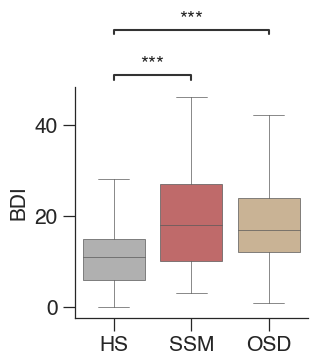

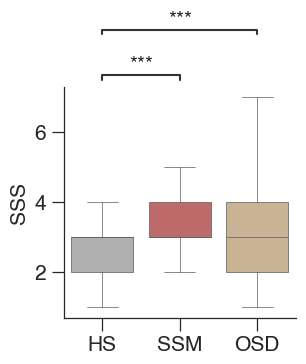

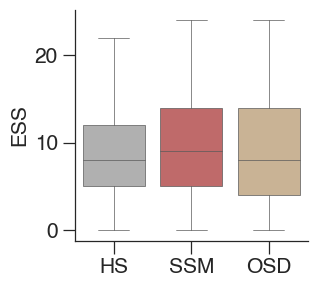

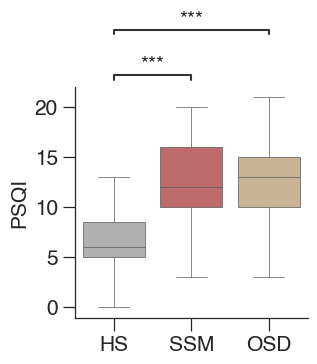

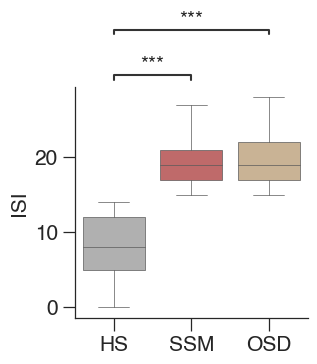

In [32]:
import matplotlib.pyplot as plt

for feature in ['BDI', 'SSS', 'ESS', 'PSQI', 'ISI']:    
    y_min=None
    y_max=None
    custom_ylabel = feature

    if feature == 'BDI':
        y_min = None; y_max=None
        # continue
    elif feature == 'ESS':
        y_min=None; y_max=None;
    elif feature == 'SSS':
        y_min=None; y_max=None;
        pass

    fig, ax = plt.subplots(1,1, figsize=(3,3))
    plot_with_statistic.stat_boxplot(_demo_summary.df_demo_HI_psm, feature, ax,
                                     _demo_summary.dic_posthoc_p_psm_age_sex,
                                     custom_ylabel=custom_ylabel,
                                     y_min=y_min, y_max=y_max)
    
    
    # plt.savefig("../results_v02/fig3/%s.png" % feature, bbox_inches='tight')


In [12]:
from modules import summary

# table
sup_table_1 = _demo_summary.df_stat_demo_psm_age_sex.copy()
sup_table_1 = sup_table_1.loc[:, ['HS', 'Subtype 1 (PDI)', 'Subtype 2 (PPI)', 'Statistic', 'p_corrected', '  ', 'Post hoc',
                                  'effect_3group', 'effect_0_vs_1', 'effect_1_vs_2', 'effect_0_vs_2']]

set_feautres = summary.set_features_2
sup_table_1 = sup_table_1.loc[["N", "sex"] + set_feautres, :]
# table_2 = table_2.loc[set_feautres, :]
sup_table_1.rename(index={"sex": "Male, %", "age": "Age", 
                      "TST": "TST (min)", "SOL": "SOL (min)", "REM_latency": "REM latency (min)", "N2_latency": "N2 latency (min)",
                      "N1": "N1 (%)", "N2": "N2 (%)", "N3": "N3 (%)", "REM": "REM (%)", "SE": "Sleep efficiency", "WASO_rel": "WASO (%)",
                      "AI": "AI (/hr)", "REM_AI_h": "REM AI (/hr)", "NREM_h": "NREM AI (/hr)",
                      "sTST": "sTST (min)", "ratio_TST": "sTST/TST", "diff_TST": "TST-sTST (min)", "rd_TST": "(TST-sTST)/TST",
                      "sSOL": "sSOL (min)", "ratio_SOL": "sSOL/SOL", "diff_SOL": "sSOL-SOL (min)", "rd_SOL": "(sSOL-SOL)/SOL"}, inplace=True)
sup_table_1 = statistics.merge_N_Male(group_num=3, df_stat=sup_table_1)

sup_table_1.to_csv("./results/v02_100veclen_healthy_insomnia_1ch/sup_table_1.csv")

sup_table_1

,HS,Subtype 1 (PDI),Subtype 2 (PPI),Statistic,p_corrected,,Post hoc,effect_3group,effect_0_vs_1,effect_1_vs_2,effect_0_vs_2
"N (male, %)",682 (45),181 (36),501 (46),,,,,,,,
BDI,11.61 (8.02),18.17 (9.45),19.25 (10.13),W,< 0.001,+++,"a <<< b , c ( >>> a)",0.321,0.108,0.850,0.786
ESS,8.72 (5.04),8.99 (5.92),9.44 (5.92),W,0.112,ns,"a , b , c ( , a)",0.010,0.075,0.132,0.052
PSQI,6.77 (3.17),12.80 (3.61),12.56 (3.67),W,< 0.001,+++,"a <<< c , b ( >>> a)",0.671,0.065,1.704,1.841
SSS,2.74 (1.12),3.38 (1.32),3.21 (1.32),W,< 0.001,+++,"a <<< c , b ( >>> a)",0.116,0.123,0.393,0.546
ISI,7.97 (4.22),19.59 (3.40),19.51 (3.33),W,< 0.001,+++,"a <<< c , b ( >>> a)",0.857,0.021,2.982,2.855


In [35]:
_demo_summary.dic_posthoc_p_psm_age_sex['SSS']

[0.3345, 0.0, 0.0]